<a href="https://colab.research.google.com/github/noushadkhan01/Basic-Mathematics-for-Machine-Learning/blob/master/Vector%20and%20Matrices%20by%20Hiren/03-02-Vector%20Multiplication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vector Multiplication
Vector multiplication can be performed in three ways:

- Scalar Multiplication
- Dot Product Multiplication
- Cross Product Multiplication

## Scalar Multiplication
Let's start with *scalar* multiplication - in other words, multiplying a vector by a single numeric value.

Suppose I want to multiply my vector by 2, which I could write like this:

\begin{equation} \vec{w} = 2\vec{v}\end{equation}

Note that the result of this calculation is a new vector named **w**. So how would we calculate this?
Recall that **v** is defined like this:

\begin{equation}\vec{v} = \begin{bmatrix}2 \\ 1 \end{bmatrix}\end{equation}

To calculate 2v, we simply need to apply the operation to each dimension value in the vector matrix, like this:

\begin{equation}\vec{w} = \begin{bmatrix}2 \cdot 2 \\  2 \cdot 1 \end{bmatrix}\end{equation}

Which gives us the following result:

\begin{equation}\vec{w} = \begin{bmatrix}2 \cdot 2 \\  2 \cdot 1 \end{bmatrix} = \begin{bmatrix}4 \\ 2 \end{bmatrix}\end{equation}

In Python, you can apply these sort of matrix operations directly to numpy arrays, so we can simply calculate **w** like this:

In [0]:
import numpy as np
np.__version__

'1.14.6'

#### must change runtime to **GPU** or **TPU** for python 3

In [1]:
from platform import python_version
print(python_version())

3.6.7


[4 2]


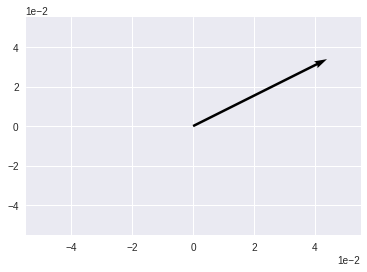

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import math

v = np.array([2,1])

w = 2 * v
print(w)

# Plot w
origin = [0], [0]
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, *w, scale=10)
plt.grid()
plt.show()

The same approach is taken for scalar division.

Try it for yourself - use the cell below to calculate a new vector named **b** based on the following definition:

\begin{equation}\vec{b} = \frac{\vec{v}}{2}\end{equation}

[1.  0.5]


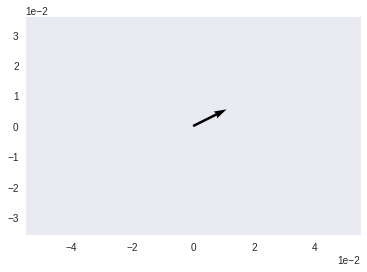

In [0]:
b = v / 2
print(b)

# Plot b
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, *b, scale=10)
plt.show()

## Dot Product Multiplication
So we've seen how to multiply a vector by a scalar. How about multiplying two vectors together? There are actually two ways to do this depending on whether you want the result to be a *scalar product* (in other words, a number) or a *vector product* (a vector).

To get a scalar product, we calculate the *dot product*. This takes a similar approach to multiplying a vector by a scalar, except that it multiplies each component pair of the vectors and sums the results. To indicate that we are performing a dot product operation, we use the &bull; operator:

\begin{equation} \vec{v} \cdot \vec{s} = (v_{1} \cdot s_{1}) + (v_{2} \cdot s_{2}) ... + \; (v_{n} \cdot s_{n})\end{equation}

So for our vectors **v** (2,1) and **s** (-3,2), our calculation looks like this:

\begin{equation} \vec{v} \cdot \vec{s} = (2 \cdot -3) + (1 \cdot 2) = -6 + 2 = -4\end{equation}

So the dot product, or scalar product, of **v** &bull; **s** is **-4**.

In Python, you can use the *numpy.**dot*** function to calculate the dot product of two vector arrays:

In [0]:
import numpy as np

v = np.array([2,1])
s = np.array([-3,2])
d = np.dot(v,s)
print (d)

-4


In Python 3.5 and later, you can also use the **@** operator to calculate the dot product:

In [0]:
import numpy as np

v = np.array([2,1])
s = np.array([-3,2])
d = v @ s
print (d)

-4


### The Cosine Rule
An useful property of vector dot product multiplication is that we can use it to calculate the cosine of the angle between two vectors. We could write the dot products as:

$$ \vec{v} \cdot \vec{s} = \|\vec{v} \|\|\vec{s}\| \cos (\theta) $$ 

Which we can rearrange as:

$$ \cos(\theta) = \frac{\vec{v} \cdot \vec{s}}{\|\vec{v} \|\|\vec{s}\|} $$

So for our vectors **v** (2,1) and **s** (-3,2), our calculation looks like this:

$$ \cos(\theta) = \frac{(2 \cdot-3) + (-3 \cdot 2)}{\sqrt{2^{2} + 1^{2}} \times \sqrt{-3^{2} + 2^{2}}} $$

So:

$$\cos(\theta) = \frac{-4}{8.0622577483}$$

Which calculates to:

$$\cos(\theta) = -0.496138938357 $$

So:

$$\theta \approx 119.74 $$

Here's that calculation in Python:

In [0]:
import math
import numpy as np

# define our vectors
v = np.array([2,1])
s = np.array([-3,2])

# get the magnitudes
vMag = np.linalg.norm(v)
sMag = np.linalg.norm(s)

# calculate the cosine of theta
cos = (v @ s) / (vMag * sMag)

# so theta (in degrees) is:
theta = math.degrees(math.acos(cos))

print(theta)


119.74488129694222


## Cross Product Multiplication
To get the *vector product* of multipying two vectors together, you must calculate the *cross product*. The result of this is a new vector that is at right angles to both the other vectors in 3D Euclidean space. This means that the cross-product only really makes sense when working with vectors that contain three components.

For example, let's suppose we have the following vectors:

\begin{equation}\vec{p} = \begin{bmatrix}2 \\ 3 \\ 1 \end{bmatrix}\;\; \vec{q} = \begin{bmatrix}1 \\ 2 \\ -2 \end{bmatrix}\end{equation}

To calculate the cross product of these vectors, written as **p** x **q**, we need to create a new vector (let's call it **r**) with three components (r<sub>1</sub>, r<sub>2</sub>, and r<sub>3</sub>). The values for these components are calculated like this:

\begin{equation}r_{1} = p_{2}q_{3} - p_{3}q_{2}\end{equation}
\begin{equation}r_{2} = p_{3}q_{1} - p_{1}q_{3}\end{equation}
\begin{equation}r_{3} = p_{1}q_{2} - p_{2}q_{1}\end{equation}

So in our case:

\begin{equation}\vec{r} = \vec{p} \times \vec{q} = \begin{bmatrix}(3 \cdot -2) - (1 \cdot 2) \\ (1 \cdot 1) - (2 \cdot -2) \\ (2 \cdot 2) - (3 \cdot 1) \end{bmatrix} = \begin{bmatrix}-6 - 2 \\ 1 - -4 \\ 4 - 3 \end{bmatrix} = \begin{bmatrix}-8 \\ 5 \\ 1 \end{bmatrix}\end{equation}

In Python, you can use the *numpy.**cross*** function to calculate the cross product of two vector arrays:

In [0]:
import numpy as np

p = np.array([2,3,1])
q = np.array([1,2,-2])
r = np.cross(p,q)
print (r)

[-8  5  1]
